In [1]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Study/BML_Project/ThucHanhCreditScoring")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# CÂY QUYẾT ĐỊNH (Decision Tree)

## Cây quyết định

Cây quyết định là phương pháp chia không gian của dữ liệu thành các hình chữ nhật rời nhau, và sử dụng giá trị để phù hợp cho mỗi hình chữ nhật. 

Giả sử không gian của dữ liệu là $X$ ta chia thành các hình chữ nhật $\{R_m\}$ rời nhau và $$X=\bigcup\limits_{m} R_m $$

Trong phần này ta mô tả thuật toán CART để xây dựng tập các hình chữ nhật $\{R_m\}$. Thuật toán trên có thể áp dụng cho bài toán **Phân loại (classification) ** và bài toán ** Hồi quy (regression)**

Giả sử không gian dữ liệu $X=\mathbb{R}^2$ với hai thuộc tính $(X_1,X_2)$ và biến phụ thuộc $Y=f(X_1,X_2)$.

In [0]:
# Hiển thị ảnh
from IPython.display import Image

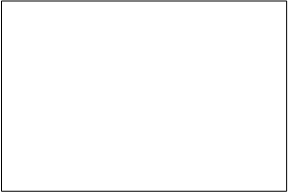

In [3]:
Image('fig_1.png')

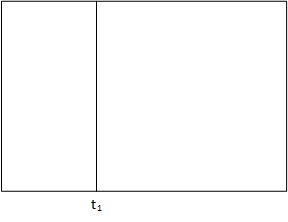

In [4]:
Image('fig_2.png')

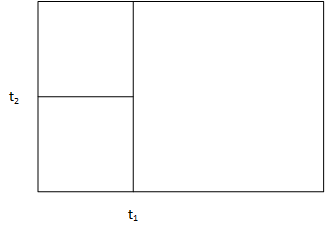

In [5]:
Image('fig_3.png')

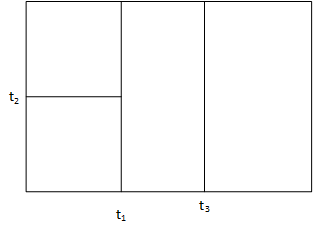

In [6]:
Image('fig_4.png')

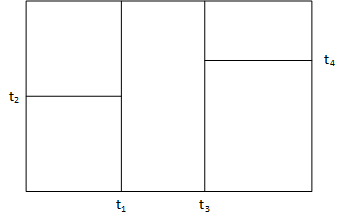

In [7]:
Image('fig_5.png')

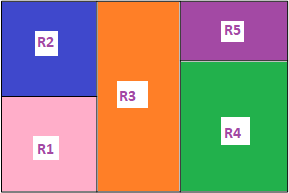

In [8]:
Image('fig_6.png')

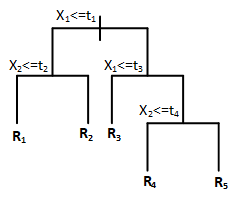

In [9]:
Image('fig_7.png')

## Một số vấn đê về xây dựng cây

Gốc của cây chứa tất cả dữ liệu, các node trung gian, các node lá.
- Các node được chia nhị phân: 
    - Chọn một thuộc tính $X_i$
    - Chọn một điểm chia $t_j$

- Độ sâu của cây?
- Số mẫu trong mỗi node lá?
- Số node lá lớn nhất?

** Root node (Nút gốc)**: Chứa toàn bộ dữ liệu mẫu. Dữ liệu này được chia thành các nhóm nhỏ hơn

** Splitting (Phân nhóm)**: Là quá trình chia các nhóm thành các nhóm nhỏ hơn

** Decision node (Nút quyết định)**: Là các nút tiếp tục được phân chia

** Leaf node (Nút lá) **: Là các nút không được phân chia

** Prunning (Tỉa cành)**: Loại bỏ một số nút phụ của cây

** Sub-Tree (nhánh)**: Là một bộ phận của cây

** Parent and Child node (Nút cha và nút con)**: Nút bị chia thành các nút phụ gọi là nút cha, các nút phụ của nút cha gọi là nút con

### Ưu và nhược điểm của cây quyết định

- **Ưu điểm:**
    - Dễ hiểu: Cây biểu diễn trực quan
    - Hữu ích: Xác định được các biến quan trọng
    - Phi tham số: không cần giả định về phân phối
    - Không phục thuộc vào dữ liệu: Có thể áp dụng cả dữ liệu phân loại và liên tục
- **Nhược điểm:**
    - Dễ bị quá khớp (overfitting)

## Phân loại dựa trên cây quyết định
- Cho dữ liệu $(x_i,y_i)$ với $y_i\in \{1,2,\dots,K\}$ chia thành $K$ nhóm.
- Với mỗi nút $m$ biểu diễn bởi miền $R_m$ với $N_m$ quan sát. Ta tính $p_{mk}$ là tỷ lệ các quan sát thuộc nhóm $k$ tại nút $m$: $$p_{mk}=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i=k]} $$
- Nút $m$ phân loại thành nhóm có tỷ lệ cao nhất $$k(m)=\arg\max_k \{p_{mk}\}$$


** Độ đo đồng nhất cho mỗi nút**
- Với mỗi nút $m$ ta đo độ đồng nhất của mỗi nút
    - Xác suất phân loại sai (missclassification error): $$Q_m=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i\ne k]}=1-p_{kk(m)}  $$
    - Chỉ số Gini: $$Q_m=\sum\limits_{k\ne l} p_{mk}p_{ml}=\sum\limits_{k=1}^K p_{mk}(1-p_{mk})=1-\sum\limits_{k=1}^K p^2_{mk} $$
    - Entropy chéo (cross-entropy): $$ Q_m=-\sum\limits_{k=1}^K p_{mk}\log p_{mk}$$

**Thuật toán:**
- Với mỗi nút ( không phải nút lá):
    - Với mỗi biến $X_k$:
        - Tìm điểm cắt tối ưu $s$ $$s=\arg\min_s \big[Q(X_k,s)=Q(x_{ik}\le s)+Q(x_{ik}> s)\big], $$  
    - Chọn biến $X_k$ và $s$ với $Q(X_k,s)$ bé nhất
- Lặp đến khi đạt đến điều kiện dừng

** Ví dụ 1 ** Phân loại dữ liệu Breast Cancer 

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [12]:
print('cancer.keys():\n {}'.format(cancer.keys()))

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
print('Kích thước dữ liệu:\n {}'.format(cancer.data.shape))

Kích thước dữ liệu:
 (569, 30)


In [14]:
print('Các thuộc tính: \n{}'.format(cancer.feature_names))

Các thuộc tính: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
print('Các lớp: \n{}'.format(cancer.target_names))

Các lớp: 
['malignant' 'benign']


** Chia dữ liệu **
- Chia dữ liệu thành:
    - Dữ liệu huấn luyện: 80%
    - Dữ liệu kiểm tra: 20%

In [0]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
x_train.shape

(455, 30)

In [18]:
x_test.shape

(114, 30)

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [0]:
# Cây quyết định
# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(random_state=42)
# tree=DecisionTreeClassifier(max_depth=4,random_state=42)

In [21]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
y_pred = tree.predict(x_test)

In [23]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 1.0000
Độ chính xác tập kiểm tra: 0.9123


In [0]:
# Biểu thị cây phân loại
# !pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

In [25]:
pip install graphviz

In [0]:
export_graphviz(tree, out_file='tree_classifier.dot', feature_names=cancer.feature_names, 
                class_names=cancer.target_names, impurity=False, filled=True)

In [27]:
sklearn?

Object `sklearn` not found.


In [0]:
# Chuyển file dot sang file ảnh
!dot -Tpng tree_classifier.dot > tree_classifier.png

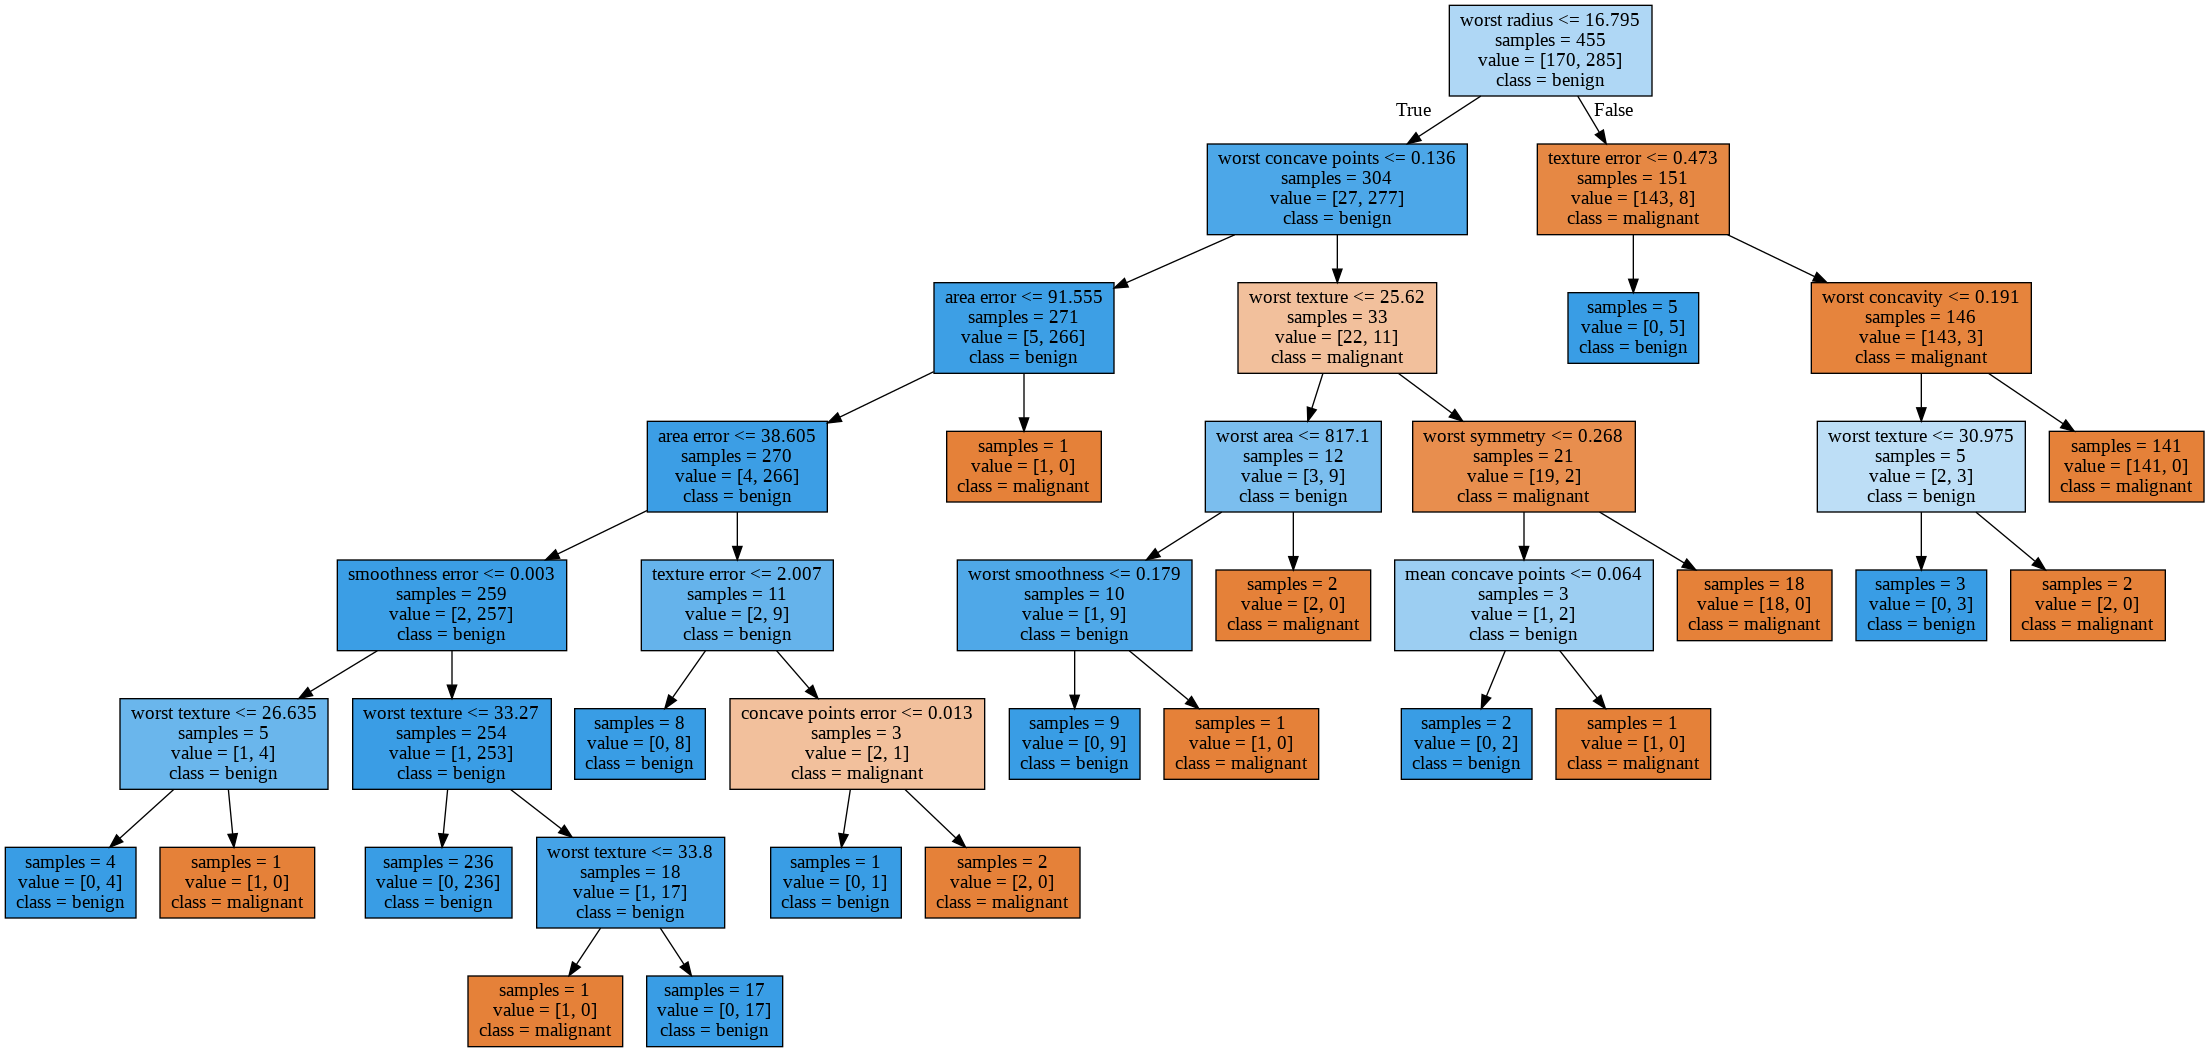

In [29]:
# Hiển thị file ảnh
from IPython.display import Image
Image(filename='tree_classifier.png')

** Mức độ quan trọng của các thuộc tính **

In [30]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00626075, 0.        , 0.        ,
       0.        , 0.05266073, 0.        , 0.01208478, 0.00177016,
       0.        , 0.        , 0.00626075, 0.        , 0.        ,
       0.69781114, 0.05888116, 0.        , 0.01267802, 0.00845201,
       0.        , 0.01632512, 0.11608267, 0.01073271, 0.        ])

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt

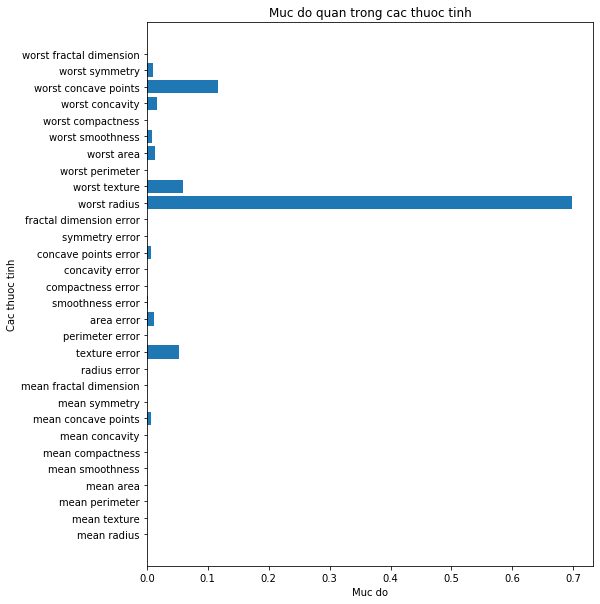

In [32]:
features = cancer.feature_names
n = len(features)
plt.figure(figsize=(8,10))
plt.barh(range(n),tree.feature_importances_)
plt.yticks(range(n),features)
plt.title('Muc do quan trong cac thuoc tinh')
plt.ylabel('Cac thuoc tinh')
plt.xlabel('Muc do')
plt.show()

## Hồi quy dựa trên cây quyết định

Giả sử ta có các mẫu quan sát $(x_i,y_i), i=1,2,\dots, N$ với $x_i=(x_{i1},x_{i2},\dots,x_{ip})$. 

- Ta xây dựng thuật toán tự động chia miền chứa các biến $x_i$ thành các hình chữ nhật $R_m$
- Ta mô tả hàm hồi quy $$y=f(x)=\sum\limits_{m=1}^M c_m I_{(x\in R_m)} $$

hàm $I_{(x\in R_m)}=1$ nếu $x\in R_m$ và $I_{(x\in R_m)}=0$ nếu $x\not\in R_m$
- Hàm hồi quy được xây dựng bằng phương pháp bình phương tối thiểu $$SSE=\sum\limits_{i=1}^N (y_i-f(x_i))^2. $$
- Ta có thể biểu diễn $$SSE=\sum\limits_{m=1}^M \sum\limits_{x_i\in R_m} (y_i-c_m)^2. $$ Giá trị $c_m$ là giá trị trung bình của các giá trị $y_i$ trong miền $R_m$, nghĩa là $$c_m={\bf mean}(y_i: x_i\in R_m). $$

**Thuật toán:**
- Với mỗi nút ( không phải nút lá):
    - Với mỗi biến $X_k$:
        - Tìm điểm cắt tối ưu $s$ $$\arg\min_s \big[\sum\limits_{x_{ik}\le s}(y_i-c_1)^2+\sum\limits_{x_{ik}> s}(y_i-c_2)^2\big], $$ với  $c_1={\bf mean} (y_i: x_{ik}\le s)$ và $c_2={\bf mean} (y_i: x_{ik}> s)$ 
    - Chọn biến $X_k$ và $s$ với $SSE$ bé nhất
- Lặp đến khi đạt đến điều kiện dừng

## Ví dụ 1

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("./data/auto-mpg.csv")

In [35]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [0]:
x = data['displacement']
y = data['mpg']

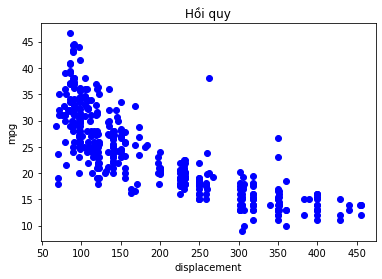

In [37]:
plt.scatter(x, y, c='blue')
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.title("Hồi quy")
plt.show()

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [0]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [0]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, random_state=3)

In [42]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [0]:
y_pred = dt.predict(x_test)

In [0]:
mse_dt = MSE(y_test, y_pred)

In [45]:
print(np.sqrt(mse_dt))

4.710198071342834


In [0]:
xx = np.linspace(min(x), max(x), 400).reshape(-1,1)

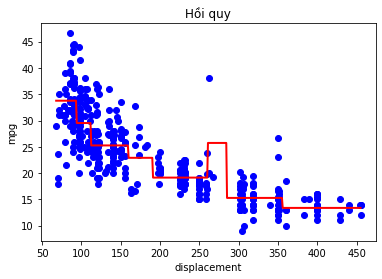

In [47]:
plt.scatter(x, y, c='blue')
plt.plot(xx, dt.predict(xx), color="red", linewidth=2)
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.title("Hồi quy")
plt.show()

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='tree.dot', feature_names=['displacement'])

In [0]:
! dot -Tpng tree.dot > tree.png

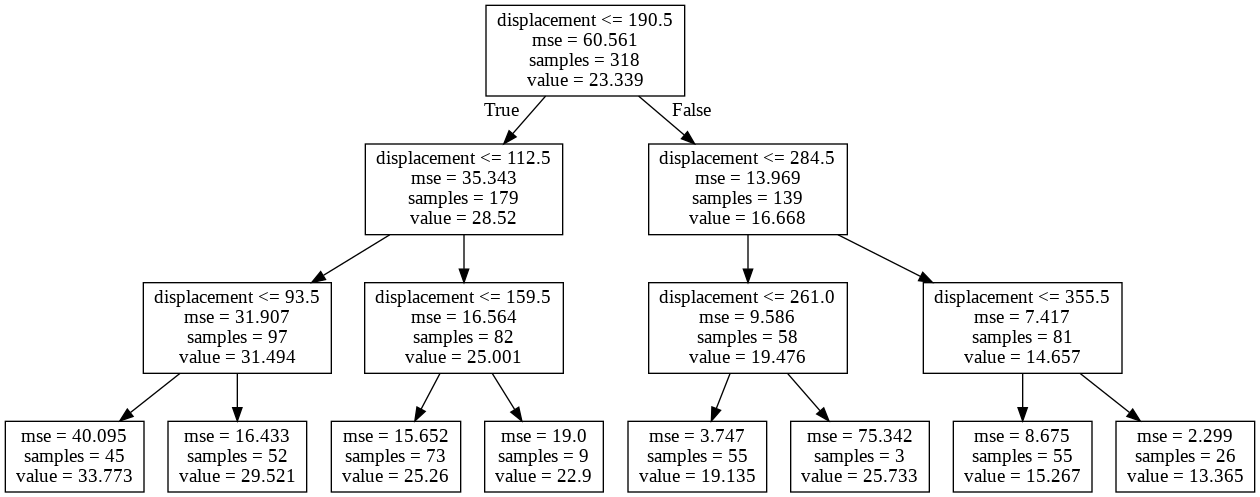

In [50]:
from IPython.display import Image
Image(filename='tree.png')

## Ví dụ 2

In [0]:
data = pd.read_csv("./data/autompg.csv")
features = data.columns.values[1:][:-1]

In [52]:
features

array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'], dtype=object)

In [0]:
x = data[features].values

In [0]:
y = data['mpg']

In [0]:
regressor = DecisionTreeRegressor(max_depth=3)

In [56]:
regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
from sklearn.tree import export_graphviz 
export_graphviz(regressor, out_file='tree_multi.dot', feature_names=features)
! dot -Tpng tree_multi.dot > tree_multi.png

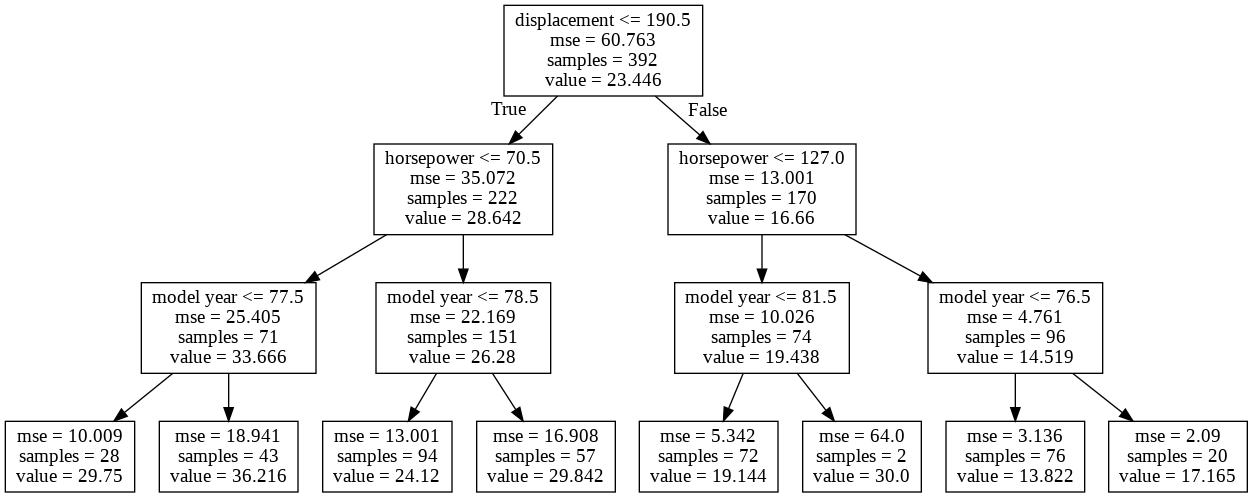

In [58]:
from IPython.display import Image
Image(filename='tree_multi.png')

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, regressor.predict(x))

2.4683364168562116

In [60]:
MSE(y, regressor.predict(x))

10.391210202107787

# Định giá tín dụng cá nhân

## Tính điểm tín dụng (Credit Scoring)
- Các ngân hàng đối mặt với các rủi ro tín dụng (vỡ nợ)
- Đánh giá tín dụng có thể áp dụng trí tuệ nhân tạo. Đánh giá khả năng chi trả:
    - Đúng hạn
    - Trễ hạn
    - Không đủ khả năng thanh toán


## Mô hình tính điểm tín dụng
- Mô hình hồi quy logistic
- Mô hình mạng neural
- Mô hình cây quyết định
- Véc-tơ hỗ trợ 

## Dữ liệu 
- Tập huấn luyện: cs-training.csv
- Tập kiểm tra: cs-test.csv

In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv("./data/cs-training.csv")

### Kiểm tra dữ liệu bị mất (NaN)

In [63]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [0]:
train = train.drop(train.columns.values[0],axis=1)

In [65]:
train.shape

(150000, 11)

In [66]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [67]:
train.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [0]:
data_features=pd.read_excel("./data/Data Dictionary.xls")

In [69]:
data_features

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


**Missing **
- 29731, MonthlyIncome
- 3924, NumberOfDependents


**Removal missing data**

In [0]:
train_no_missing = train.dropna()# remove missing values

In [71]:
train_no_missing.shape

(120269, 11)

**Imputation by mean**

In [0]:
train_imputer = train

In [0]:
train_imputer["MonthlyIncome"].fillna(train_imputer["MonthlyIncome"].mean(), inplace=True)

In [0]:
train_imputer["NumberOfDependents"].fillna(train_imputer["NumberOfDependents"].mean(), inplace=True)

In [75]:
train_imputer.shape

(150000, 11)

### Dữ liệu huấn luyện

In [0]:
x_train = train_no_missing.drop(train_no_missing.columns.values[0],axis=1)

In [77]:
x_train.shape

(120269, 10)

In [0]:
y_train = train_no_missing[train.columns.values[0]]

In [79]:
y_train.shape

(120269,)

### Dữ liệu kiểm tra

In [0]:
test = pd.read_csv("./data/cs-test.csv")

In [0]:
test = test.drop(test.columns.values[0], axis=1)

In [82]:
test.shape

(101503, 11)

In [83]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [84]:
x_test = test.drop(test.columns.values[0], axis=1)
x_test.shape

(101503, 10)

In [0]:
y_test = test[test.columns.values[0]]

In [86]:
y_test.shape

(101503,)

### Kiểm tra dữ liệu bị mất (missing)

In [87]:
x_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

** Bỏ qua các bản ghi không có giá trị **

In [88]:
x_test_no_missing = x_test.dropna()
x_test_no_missing.shape
# x_test_no_missing.isnull().sum()

(81400, 10)

** Khôi phục các bản ghi không có giá trị**

In [0]:
x_test_imputer = x_test

In [0]:
x_test_imputer["MonthlyIncome"].fillna(x_test_imputer["MonthlyIncome"].mean(), inplace=True)

In [0]:
x_test_imputer["NumberOfDependents"].fillna(x_test_imputer["NumberOfDependents"].mean(), inplace=True)

In [92]:
x_test_imputer.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Mô hình học máy (Decision tree regression)

### Đối với dữ liệu loại bỏ các bản ghi bị lỗi

In [93]:
# x_train, y_train, x_test_no_missing
print(x_train.shape,
y_train.shape,
x_test_no_missing.shape)

(120269, 10) (120269,) (81400, 10)


In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# max_depth=None,            
# max_leaf_nodes=None,            
# min_samples_leaf=None, 
# regressor = DecisionTreeRegressor(min_samples_leaf=100)
regressor = DecisionTreeRegressor(max_depth=10)
# regressor = DecisionTreeRegressor(max_leaf_nodes=100)

In [96]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [97]:
regressor.score(x_train, y_train)

0.2767372633376264

In [0]:
features=x_train.columns.values

In [99]:
from sklearn.tree import export_graphviz 
export_graphviz(regressor, out_file='tree_credit.dot', feature_names=features)
! dot -Tpng tree_credit.dot > tree_credit.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.448427 to fit


In [0]:
y_predict = regressor.predict(x_test_no_missing)

In [101]:
y_predict[:5]

array([0.0764715 , 0.02876535, 0.02191235, 0.06091519, 0.0764715 ])

In [0]:
import matplotlib.pyplot as plt

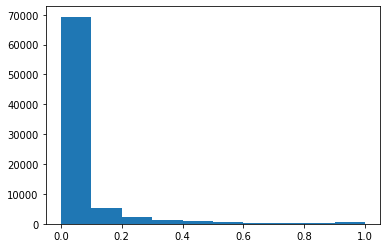

In [103]:
plt.hist(y_predict, bins=10)
plt.show()

In [104]:
regressor.score(x_train, y_train)

0.2767372633376264

### Đối với dữ liệu Imputed

In [105]:
# train_imputer, x_test_imputer
print(train_imputer.shape, x_test_imputer.shape)

(150000, 11) (101503, 10)


In [0]:
x_train = train_imputer.drop(train_imputer.columns.values[0],axis=1)
y_train = train_imputer[train_imputer.columns.values[0]]

In [0]:
# max_depth=None,            
# max_leaf_nodes=None,            
# min_samples_leaf=None, 
# dt_reg = DecisionTreeRegressor(min_samples_leaf=10)
dt_reg = DecisionTreeRegressor(max_depth=25)
# dt_reg = DecisionTreeRegressor(max_leaf_nodes=100)

In [108]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [109]:
from sklearn.tree import export_graphviz 
export_graphviz(dt_reg, out_file='tree_credit_imputer.dot', feature_names=features)
! dot -Tpng tree_credit_imputer.dot > tree_credit_imputer.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.06063 to fit


In [0]:
y_pred_imputer=dt_reg.predict(x_test_imputer)

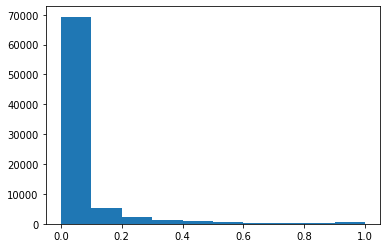

In [111]:
plt.hist(y_predict, bins=10)
plt.show()

In [112]:
dt_reg.score(x_train, y_train)

0.8828006823853539

## Đánh giá kết quả